# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv("../ex00/data/am_pm.csv")
df

,date,am,pm,target,target_num,predict
0,2020-04-17,21,2,working_day,0,1
1,2020-04-18,1,68,weekend,1,0
2,2020-04-19,18,15,weekend,1,0
3,2020-04-20,2,23,working_day,0,0
4,2020-04-21,0,25,working_day,0,0
5,2020-04-22,0,28,working_day,0,0
6,2020-04-23,10,33,working_day,0,0
7,2020-04-24,2,14,working_day,0,0
8,2020-04-25,30,74,weekend,1,0
9,2020-04-26,28,233,weekend,1,0


#### Modelni tayyorlash

In [3]:
X = df[['am', 'pm']]
y = df['target_num']

In [4]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [5]:
# 'am' va 'pm' qiymatlari diapazonini biroz kengaytiramiz
x_min, x_max = X['am'].min() - 5, X['am'].max() + 5
y_min, y_max = X['pm'].min() - 5, X['pm'].max() + 5

# Meshgrid yaratamiz
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Meshgrid nuqtalari uchun bashorat qilamiz
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

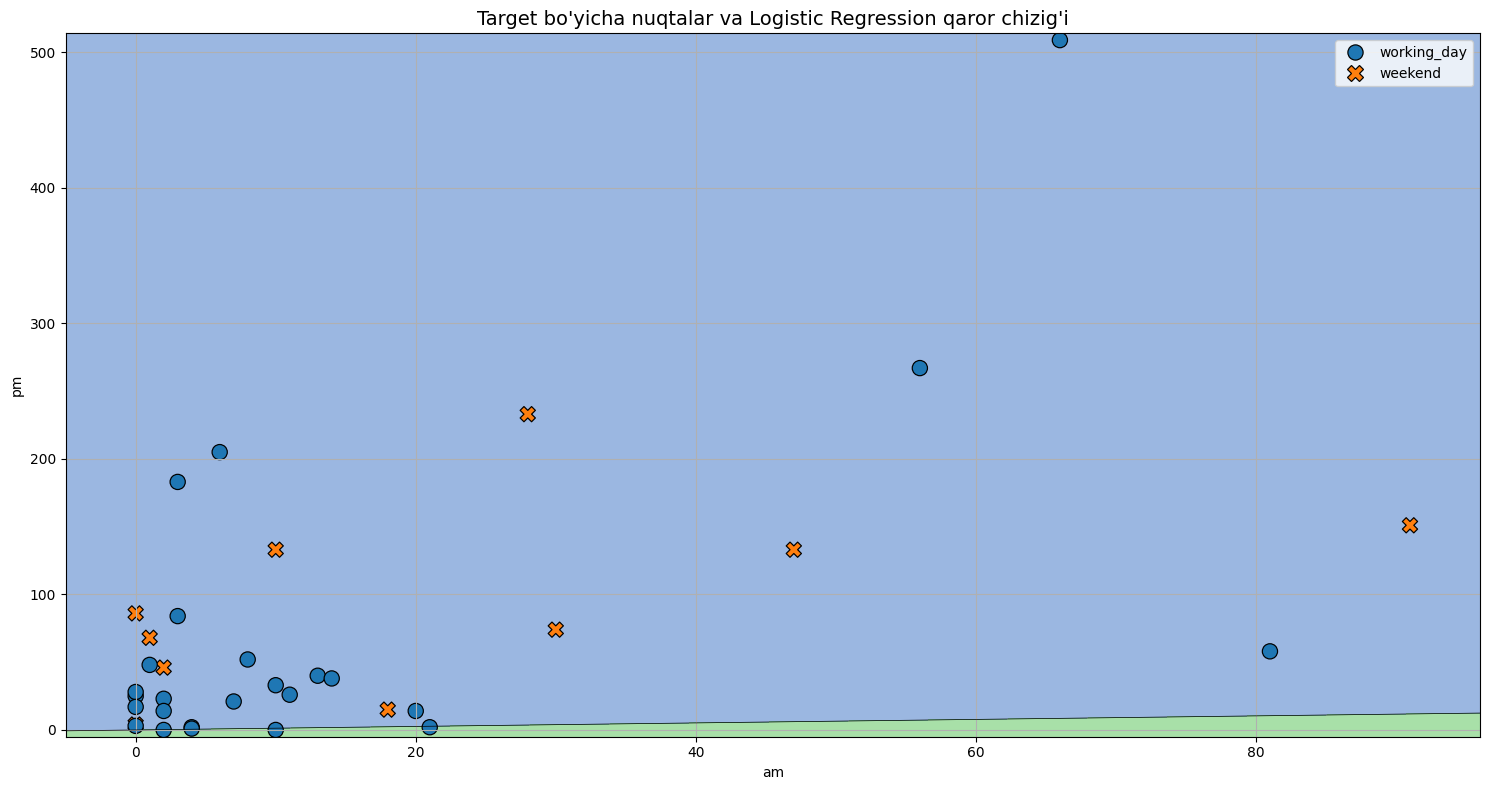

In [6]:
plt.figure(figsize=(15, 8))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], colors=["#3870C5", "#53C253"], alpha=0.5)
sns.scatterplot(data=df, x="am", y="pm", hue="target", style="target", s=120, edgecolor="black")
# Qaror chizig‘i (0.5 ehtimollik chegarasi)
plt.contour(xx, yy, probs, levels=[0.5], colors="black", linestyles="-", linewidths=0.5)
plt.title("Target bo'yicha nuqtalar va Logistic Regression qaror chizig'i", fontsize=14)
plt.xlabel("am")
plt.ylabel("pm")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
df["predict"] = model.predict(X)
df["predict_label"] = df["predict"].map({0: "working_day", 1: "weekend"})
df

,date,am,pm,target,target_num,predict,predict_label
0,2020-04-17,21,2,working_day,0,1,weekend
1,2020-04-18,1,68,weekend,1,0,working_day
2,2020-04-19,18,15,weekend,1,0,working_day
3,2020-04-20,2,23,working_day,0,0,working_day
4,2020-04-21,0,25,working_day,0,0,working_day
5,2020-04-22,0,28,working_day,0,0,working_day
6,2020-04-23,10,33,working_day,0,0,working_day
7,2020-04-24,2,14,working_day,0,0,working_day
8,2020-04-25,30,74,weekend,1,0,working_day
9,2020-04-26,28,233,weekend,1,0,working_day


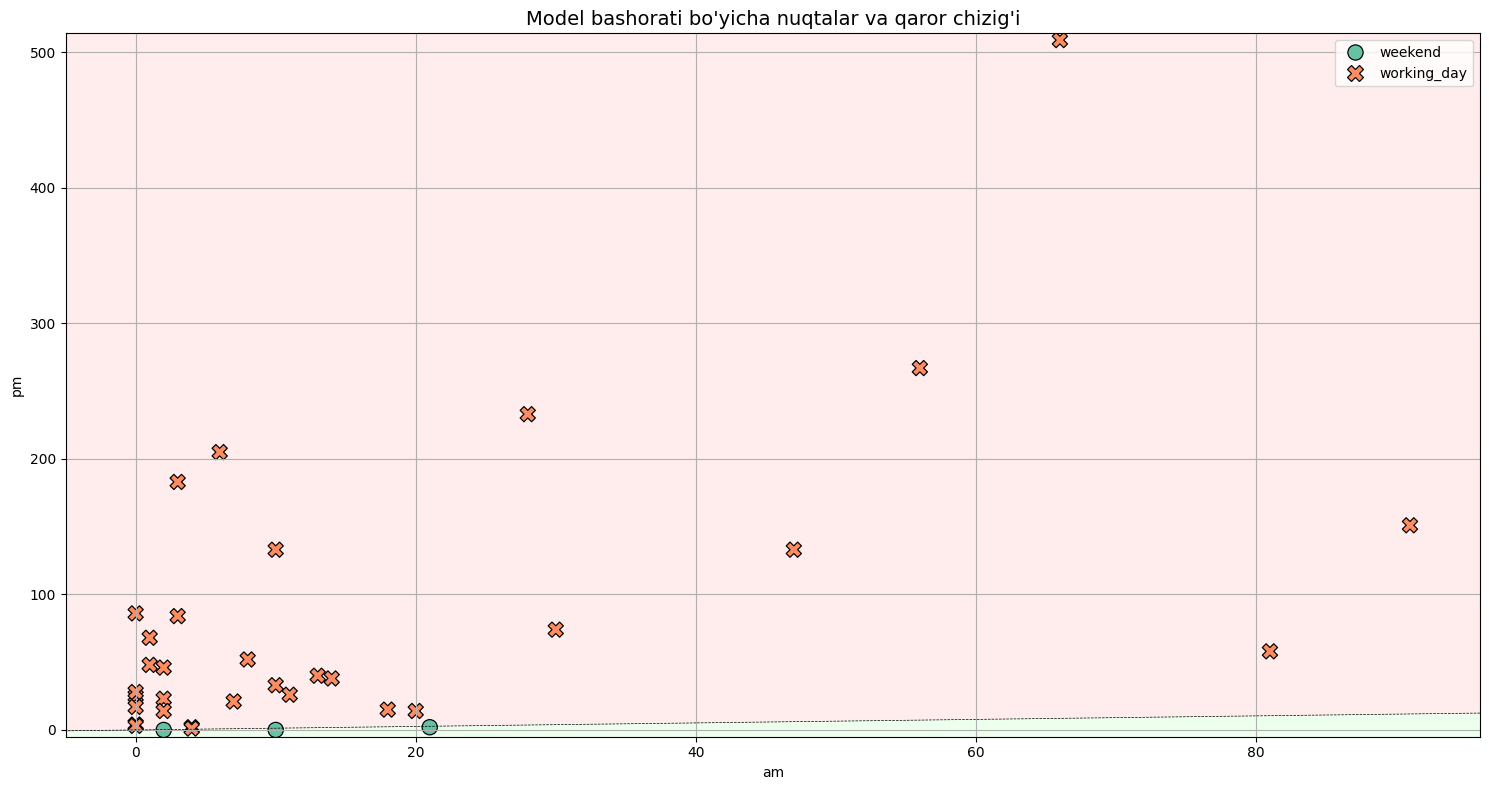

In [8]:
plt.figure(figsize=(15, 8))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], colors=["#FFDDDD", "#DDFFDD"], alpha=0.5)
# Nuqtalar (model bashorati asosida)
sns.scatterplot(data=df, x="am", y="pm", hue="predict_label", style="predict_label", s=120, edgecolor="black", palette="Set2")
# Qaror chizig‘i
plt.contour(xx, yy, probs, levels=[0.5], colors="black", linestyles="--", linewidths=0.5)

plt.title("Model bashorati bo'yicha nuqtalar va qaror chizig'i", fontsize=14)
plt.xlabel("am")
plt.ylabel("pm")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [9]:
scaler = StandardScaler() # Scaler obyektini yaratish
X_scaled = scaler.fit_transform(X) # Har bir qiymatni standartlashtiradi. fit() va transform() ni birdan bajaradi

In [10]:
scaled_model = LogisticRegression(random_state=21, fit_intercept=False)
scaled_model.fit(X_scaled, y) 

LogisticRegression(fit_intercept=False, random_state=21)

In [11]:
# Yangi modelning bashoratlarini olamiz
y_pred_scaled = scaled_model.predict(X_scaled)

In [12]:
# Yangi modelning aniqligini hisoblaymiz
accuracy_scaled_model = accuracy_score(y, y_pred_scaled)
print(f"Accuracy of the scaled model: {accuracy_scaled_model}")

Accuracy of the scaled model: 0.7428571428571429


In [13]:
# Eng mashhur class ni topish, eng ko'p takrorlangan qiymat
most_popular_class = y.mode()[0]

In [14]:
# Naive classifier bashoratlarini yaratamiz (hammasi eng mashhur sinf)
y_pred_naive = np.full_like(y, most_popular_class)
#  bu {y} bilan bir xil shakl va turga ega bo'lgan, lekin barcha elementlari {most_popular_class} qiymatiga teng bo'lgan yangi massiv yaratadi.

In [15]:
# Naive classifier aniqligini hisoblaymiz
accuracy_naive_classifier = accuracy_score(y, y_pred_naive)
print(f"Accuracy of Naive Classifier (most popular class): {accuracy_naive_classifier}")

Accuracy of Naive Classifier (most popular class): 0.7142857142857143


In [16]:
x_min_scaled, x_max_scaled = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min_scaled, y_max_scaled = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5

xx_scaled, yy_scaled = np.meshgrid(np.linspace(x_min_scaled, x_max_scaled, 500),
                                   np.linspace(y_min_scaled, y_max_scaled, 500))

In [17]:
# Meshgrid nuqtalari uchun bashorat qilamiz
Z_scaled = scaled_model.predict(np.c_[xx_scaled.ravel(), yy_scaled.ravel()])
Z_scaled = Z_scaled.reshape(xx_scaled.shape)

In [18]:
df_scaled = pd.DataFrame(X_scaled, columns=['am_scaled', 'pm_scaled'])
df_scaled['target'] = df['target']
df_scaled['target_num'] = df['target_num']
df_scaled['predict'] = scaled_model.predict(X_scaled) # Yangi modelning bashoratlarini saqlaymiz

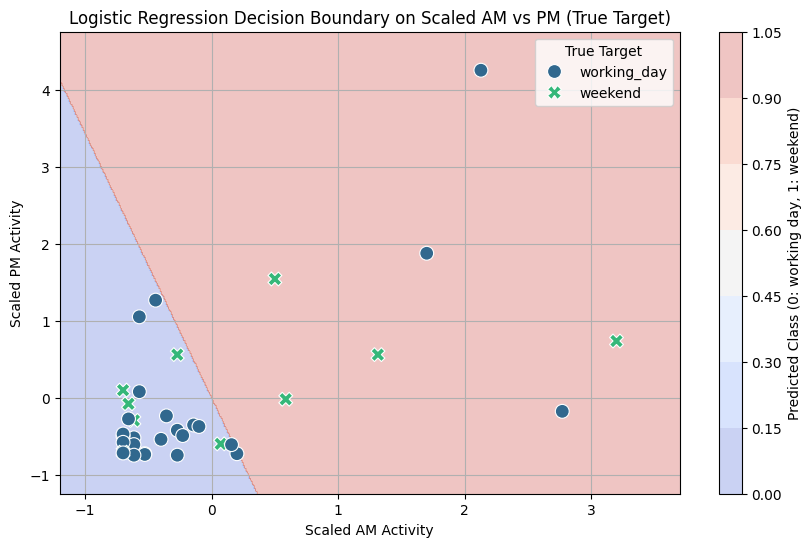

In [19]:
plt.figure(figsize=(10, 6))
plt.contourf(xx_scaled, yy_scaled, Z_scaled, alpha=0.3, cmap='coolwarm', zorder=1)
cbar = plt.colorbar(label='Predicted Class (0: working day, 1: weekend)')

sns.scatterplot(data=df_scaled, x='am_scaled', y='pm_scaled', hue='target', style='target', s=100, zorder=2, palette='viridis')

plt.title('Logistic Regression Decision Boundary on Scaled AM vs PM (True Target)')
plt.xlabel('Scaled AM Activity')
plt.ylabel('Scaled PM Activity')
plt.legend(title='True Target')
plt.grid(True)
plt.show()


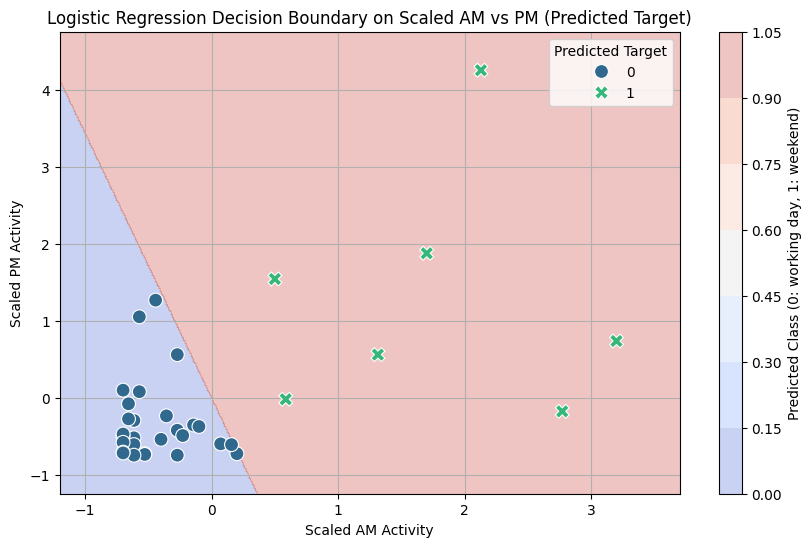

In [20]:
plt.figure(figsize=(10, 6))

plt.contourf(xx_scaled, yy_scaled, Z_scaled, alpha=0.3, cmap='coolwarm', zorder=1)
cbar = plt.colorbar(label='Predicted Class (0: working day, 1: weekend)')

sns.scatterplot(data=df_scaled, x='am_scaled', y='pm_scaled', hue='predict', style='predict', s=100, zorder=2, palette='viridis')

plt.title('Logistic Regression Decision Boundary on Scaled AM vs PM (Predicted Target)')
plt.xlabel('Scaled AM Activity')
plt.ylabel('Scaled PM Activity')
plt.legend(title='Predicted Target')
plt.grid(True)
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [21]:
# StandardScaler'ni yaratamiz va xususiyatlarni masshtablaymiz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Masshtablangan ma'lumotlar uchun DataFrame yaratamiz (grafik chizish qulay bo'lishi uchun)
df_scaled = pd.DataFrame(X_scaled, columns=['am_scaled', 'pm_scaled'])
df_scaled['target'] = df['target']
df_scaled['target_num'] = df['target_num']
df_scaled.head()

,am_scaled,pm_scaled,target,target_num
0,0.200690,-0.719904,working_day,0
1,-0.655914,-0.071822,weekend,1
2,0.072199,-0.592251,weekend,1
3,-0.613084,-0.513696,working_day,0
4,-0.698744,-0.494057,working_day,0


In [23]:
# SVC ikki sinfni eng yaxshi ajratadigan chiziq (hyperplane) topadi va bu chiziq ikkala sinfga imkon qadar uzoq bo‘lishi kerak.
svc_model = SVC(probability=True, random_state=21, kernel='rbf') 
svc_model.fit(X_scaled, y)

SVC(probability=True, random_state=21)

In [24]:
# Bashoratlar olamiz
y_pred_svc = svc_model.predict(X_scaled)

In [25]:
# Aniqlikni hisoblaymiz
accuracy_svc = accuracy_score(y, y_pred_svc)
print(f"SVC (rbf kernel) model accuracy(aniqligi): {accuracy_svc}")

SVC (rbf kernel) model accuracy(aniqligi): 0.7428571428571429


In [26]:
df_scaled['svc_predict'] = y_pred_svc
df_scaled.head()

,am_scaled,pm_scaled,target,target_num,svc_predict
0,0.200690,-0.719904,working_day,0,0
1,-0.655914,-0.071822,weekend,1,0
2,0.072199,-0.592251,weekend,1,0
3,-0.613084,-0.513696,working_day,0,0
4,-0.698744,-0.494057,working_day,0,0


In [27]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_kernel = ''
best_svc_model = None

print("\nTurli kernellar bilan SVC aniqliklari:")
for kernel in kernels:
    model = SVC(probability=True, random_state=21, kernel=kernel)
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    acc = accuracy_score(y, y_pred)
    print(f"  Kernel: {kernel}, Accuracy: {acc}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_kernel = kernel
        best_svc_model = model

print(f"\nEng yaxshi kernel: {best_kernel} (Accuracy: {best_accuracy})")

final_svc_model = best_svc_model
final_y_pred_svc = final_svc_model.predict(X_scaled)
df_scaled['svc_predict'] = final_y_pred_svc


Turli kernellar bilan SVC aniqliklari:
  Kernel: linear, Accuracy: 0.7142857142857143
  Kernel: poly, Accuracy: 0.7428571428571429
  Kernel: rbf, Accuracy: 0.7428571428571429
  Kernel: sigmoid, Accuracy: 0.6857142857142857

Eng yaxshi kernel: poly (Accuracy: 0.7428571428571429)


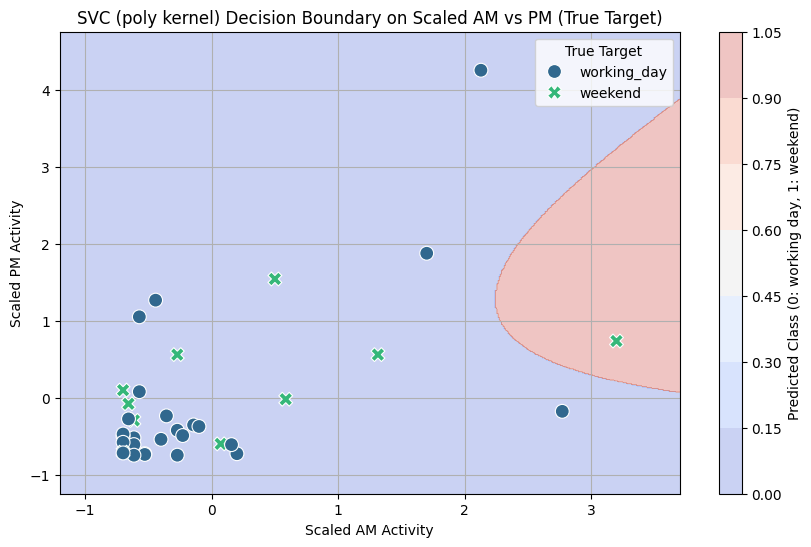

In [28]:
# Qaror chegarasini chizish uchun meshgrid yaratamiz
x_min_scaled, x_max_scaled = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min_scaled, y_max_scaled = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5

xx_scaled, yy_scaled = np.meshgrid(np.linspace(x_min_scaled, x_max_scaled, 500),
                                   np.linspace(y_min_scaled, y_max_scaled, 500))

# Meshgrid nuqtalari uchun bashorat qilamiz (eng yaxshi model yordamida)
Z_svc = final_svc_model.predict(np.c_[xx_scaled.ravel(), yy_scaled.ravel()])
Z_svc = Z_svc.reshape(xx_scaled.shape)

plt.figure(figsize=(10, 6))

# Qaror chegarasini to'ldirilgan kontur sifatida chizamiz
plt.contourf(xx_scaled, yy_scaled, Z_svc, alpha=0.3, cmap='coolwarm', zorder=1)
cbar = plt.colorbar(label='Predicted Class (0: working day, 1: weekend)')

# Ma'lumot nuqtalarini chizamiz, 'target' ustuniga qarab ranglaymiz
sns.scatterplot(data=df_scaled, x='am_scaled', y='pm_scaled', hue='target', style='target', s=100, zorder=2, palette='viridis')

plt.title(f'SVC ({best_kernel} kernel) Decision Boundary on Scaled AM vs PM (True Target)')
plt.xlabel('Scaled AM Activity')
plt.ylabel('Scaled PM Activity')
plt.legend(title='True Target')
plt.grid(True)
plt.show()

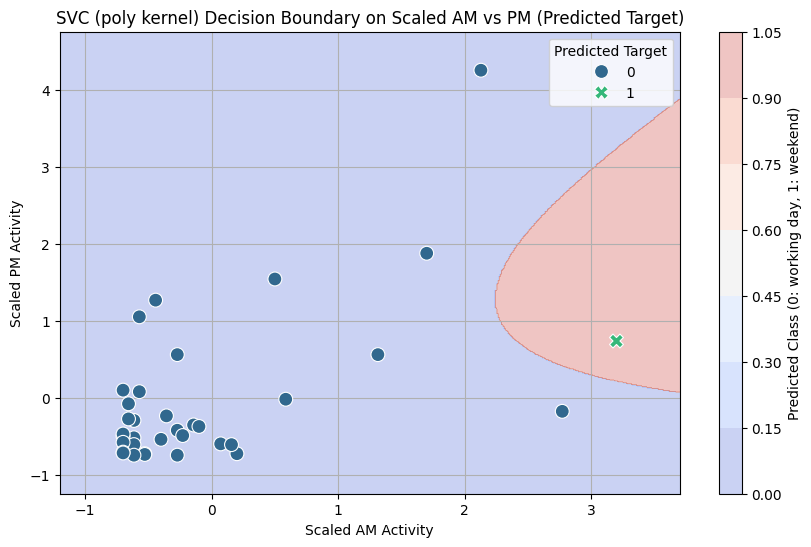

In [29]:
plt.figure(figsize=(10, 6))

# Qaror chegarasini to'ldirilgan kontur sifatida chizamiz
plt.contourf(xx_scaled, yy_scaled, Z_svc, alpha=0.3, cmap='coolwarm', zorder=1)
cbar = plt.colorbar(label='Predicted Class (0: working day, 1: weekend)')

# Ma'lumot nuqtalarini chizamiz, 'svc_predict' ustuniga qarab ranglaymiz
sns.scatterplot(data=df_scaled, x='am_scaled', y='pm_scaled', hue='svc_predict', style='svc_predict', s=100, zorder=2, palette='viridis')

plt.title(f'SVC ({best_kernel} kernel) Decision Boundary on Scaled AM vs PM (Predicted Target)')
plt.xlabel('Scaled AM Activity')
plt.ylabel('Scaled PM Activity')
plt.legend(title='Predicted Target')
plt.grid(True)
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [30]:
X = df[['am', 'pm']]
y = df['target_num']

In [31]:
# StandardScaler'ni yaratamiz va xususiyatlarni masshtablaymiz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Masshtablangan ma'lumotlar uchun DataFrame yaratamiz (grafik chizish qulay bo'lishi uchun)
df_scaled = pd.DataFrame(X_scaled, columns=['am_scaled', 'pm_scaled'])
df_scaled['target'] = df['target']
df_scaled['target_num'] = df['target_num']

In [33]:
# DecisionTreeClassifier modelini yaratamiz
dt_model_default = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_default.fit(X_scaled, y)

y_pred_dt_default = dt_model_default.predict(X_scaled)

# Aniqlikni hisoblaymiz
accuracy_dt_default = accuracy_score(y, y_pred_dt_default)
print(f"Decision Tree (max_depth=4) model accuracy: {accuracy_dt_default}")

# df_scaled DataFrame'iga DT modelining bashoratlarini qo'shamiz
df_scaled['dt_predict'] = y_pred_dt_default

Decision Tree (max_depth=4) model accuracy: 0.9428571428571428


In [34]:
depths = [1, 2, 3, 4, 5, 6, 7, None] # None - bu to'liq o'sgan daraxtni anglatadi
best_accuracy_dt = 0
best_max_depth = None
best_dt_model = None

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    acc = accuracy_score(y, y_pred)

    if acc > best_accuracy_dt:
        best_accuracy_dt = acc
        best_max_depth = depth
        best_dt_model = model

# Eng yaxshi modelni keyingi vizualizatsiya uchun tayyorlaymiz
final_dt_model = best_dt_model
final_y_pred_dt = final_dt_model.predict(X_scaled)
df_scaled['dt_predict'] = final_y_pred_dt

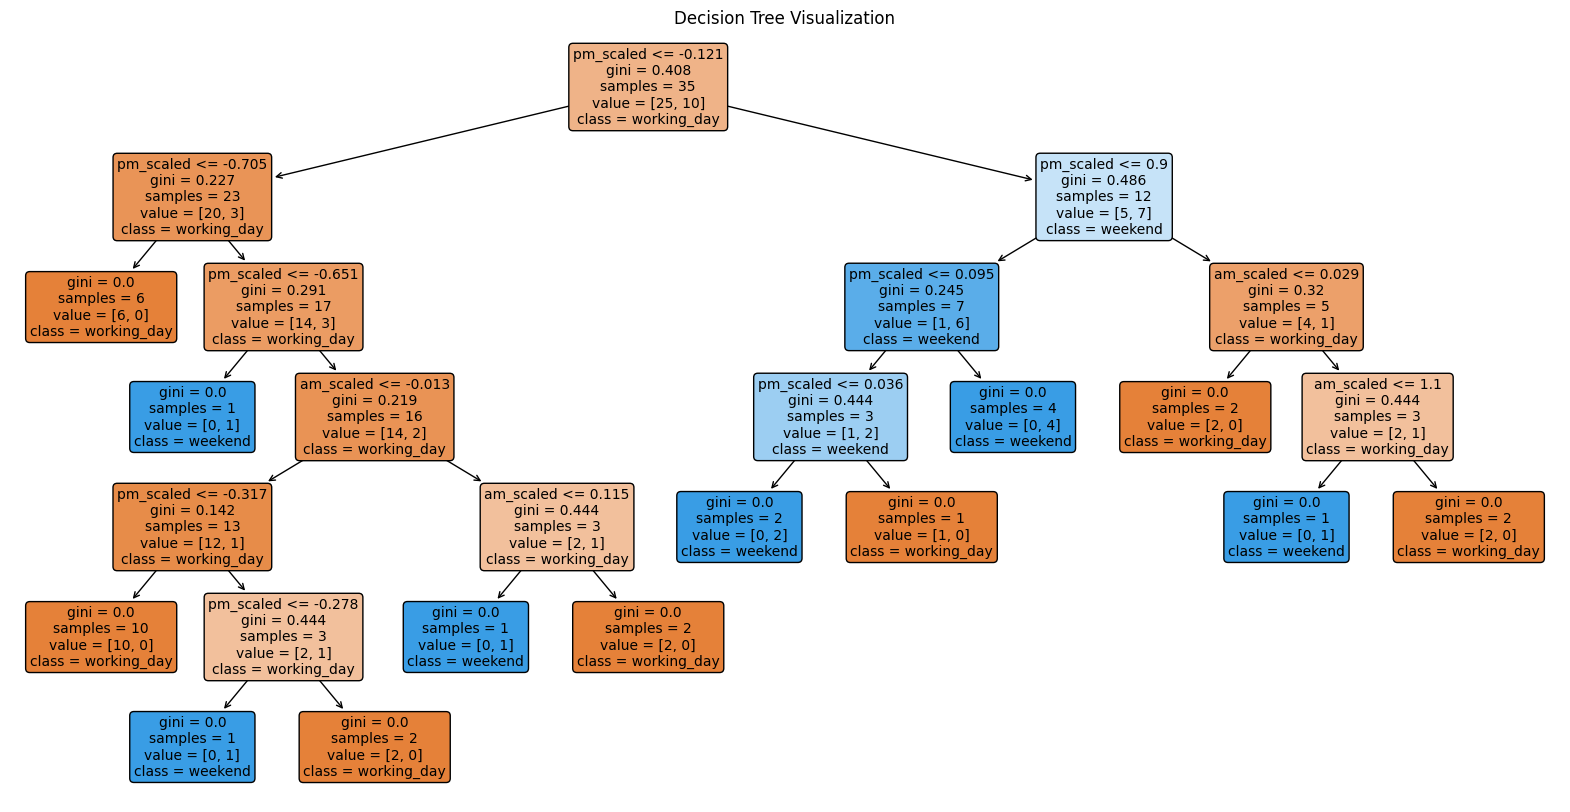

In [35]:
plt.figure(figsize=(20, 10))
plot_tree(final_dt_model,
          feature_names=['am_scaled', 'pm_scaled'], # Xususiyat nomlari
          class_names=['working_day', 'weekend'],   # Sinf nomlari
          filled=True,                              # Tugunlarni sinfga qarab to'ldirish
          rounded=True,                             # Tugunlarning burchaklarini yumaloqlash
          fontsize=10)
plt.title(f'Decision Tree Visualization')
plt.show()

Answer the question is `4`